# Image Datasets
Image datasets in this context are directories of files. Kaishi has a lot of built in functionality for interacting with them. While kaishi has many built-in pipeline components that operate on image datasets, a lot of the standard ETL is handled for you in the event you want to add your own custom code (without the ETL hassle).

The following pages are a single example meant to be run concurrently.

## Initializing datasets
Let's start by downloading a sample dataset to work with. You will need wget installed unless using your own directory of files.

In [1]:
import wget
import pickle
from PIL import Image
import tarfile
import os

wget.download("http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz")
tarfile.open("101_ObjectCategories.tar.gz").extractall()
os.remove("101_ObjectCategories.tar.gz")

First, initialize a kaishi image dataset object and print a descriptive report of files.

In [2]:
from kaishi.image.dataset import ImageDataset
imd = ImageDataset("101_objectCategories", recursive=True)
imd.file_report()

Current file list:
+-------+--------------------------+---------------------------------------+--------+
| Index |        File Name         | Children                              | Labels |
+-------+--------------------------+---------------------------------------+--------+
|   0   |  gerenuk/image_0032.jpg  |     {'duplicates': [], 'similar': []} |   []   |
|   1   |  gerenuk/image_0026.jpg  |     {'duplicates': [], 'similar': []} |   []   |
|   2   |  gerenuk/image_0027.jpg  |     {'duplicates': [], 'similar': []} |   []   |
|   3   |  gerenuk/image_0033.jpg  |     {'duplicates': [], 'similar': []} |   []   |
|   4   |  gerenuk/image_0019.jpg  |     {'duplicates': [], 'similar': []} |   []   |
|   5   |  gerenuk/image_0025.jpg  |     {'duplicates': [], 'similar': []} |   []   |
|   6   |  gerenuk/image_0031.jpg  |     {'duplicates': [], 'similar': []} |   []   |
|   7   |  gerenuk/image_0030.jpg  |     {'duplicates': [], 'similar': []} |   []   |
|  ...  |                          

/Users/mwharton/.miniconda3/envs/kaishi/lib/python3.7/site-packages/kaishi/image/dataset.py:20: UserWarning: No GPU detected, ConvNet prediction tasks will be very slow
  warnings.warn("No GPU detected, ConvNet prediction tasks will be very slow")


There are almost 10k images in this directory, let's use a subdirectory to keep the dataset small.

In [3]:
imd = ImageDataset("101_objectCategories/Faces")
imd.file_report()

Current file list:
+-------+----------------+---------------------------------------+--------+
| Index |   File Name    | Children                              | Labels |
+-------+----------------+---------------------------------------+--------+
|   0   | image_0146.jpg |     {'duplicates': [], 'similar': []} |   []   |
|   1   | image_0152.jpg |     {'duplicates': [], 'similar': []} |   []   |
|   2   | image_0185.jpg |     {'duplicates': [], 'similar': []} |   []   |
|   3   | image_0191.jpg |     {'duplicates': [], 'similar': []} |   []   |
|   4   | image_0378.jpg |     {'duplicates': [], 'similar': []} |   []   |
|   5   | image_0344.jpg |     {'duplicates': [], 'similar': []} |   []   |
|   6   | image_0422.jpg |     {'duplicates': [], 'similar': []} |   []   |
|   7   | image_0350.jpg |     {'duplicates': [], 'similar': []} |   []   |
|  ...  |                |                                       |        |
|  427  | image_0349.jpg |     {'duplicates': [], 'similar': []} |   

## Interaction with datasets
Now, let's look at a couple ways to access the images.

Each of these "files" are actually kaishi.image.file.File objects, which have quite a few interesting methods to enable rapid analysis. Each image object is initialized to None by default, but verify_loaded() will load an individual file, whereas load_all() will load all of them. If running a pipeline, load_all() will be called for you.

In [4]:
imd.files[:10]

[image_0146.jpg,
 image_0152.jpg,
 image_0185.jpg,
 image_0191.jpg,
 image_0378.jpg,
 image_0344.jpg,
 image_0422.jpg,
 image_0350.jpg,
 image_0387.jpg,
 image_0393.jpg]

In [5]:
print(imd.files[0].image is None)
imd.files[0].verify_loaded()
print(imd.files[0].image is None)

True
False


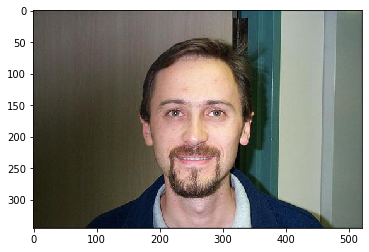

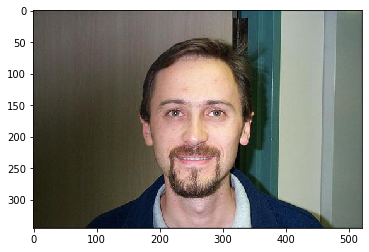

In [6]:
import matplotlib.pyplot as plt
plt.imshow(imd.files[0].image)
plt.show()
plt.imshow(imd["image_0146.jpg"].image)
plt.show()

## Image processing pipelines
Let's see the pipeline options.

In [7]:
imd.get_pipeline_options()

['FilterByLabel',
 'FilterByRegex',
 'FilterDuplicateFiles',
 'FilterInvalidFileExtensions',
 'FilterInvalidImageHeaders',
 'FilterSimilar',
 'FilterSubsample',
 'LabelerGenericConvnet',
 'LabelerValidationAndTest',
 'TransformFixRotation',
 'TransformLimitDimensions',
 'TransformToGrayscale']

Now we can create, configure, and run a pipeline.

Note: the default regex pattern does not perform any filtering.

In [8]:
imd.configure_pipeline(["FilterInvalidImageHeaders", "FilterDuplicateFiles", "FilterByRegex", "TransformLimitDimensions", "TransformToGrayscale"])
print(imd.pipeline)

Kaishi pipeline: 
0: FilterInvalidImageHeaders
1: FilterDuplicateFiles
2: FilterByRegex
     pattern: '/(?=a)b/'
3: TransformLimitDimensions
     max_dimension: None
     max_width: None
     max_height: None
4: TransformToGrayscale



In [9]:
imd.pipeline.components[2].configure(pattern="image_02.*jpg")
imd.pipeline.components[3].configure(max_dimension=400)
print(imd.pipeline)

Kaishi pipeline: 
0: FilterInvalidImageHeaders
1: FilterDuplicateFiles
2: FilterByRegex
     pattern: 'image_02.*jpg'
3: TransformLimitDimensions
     max_dimension: 400
     max_width: None
     max_height: None
4: TransformToGrayscale



In [10]:
imd.run_pipeline()

Now we can analyze the results.

In [11]:
imd.file_report()

Current file list:
+-------+----------------+---------------------------------------+---------------+
| Index |   File Name    | Children                              |     Labels    |
+-------+----------------+---------------------------------------+---------------+
|   0   | image_0146.jpg |     {'duplicates': [], 'similar': []} | ['GRAYSCALE'] |
|   1   | image_0152.jpg |     {'duplicates': [], 'similar': []} | ['GRAYSCALE'] |
|   2   | image_0185.jpg |     {'duplicates': [], 'similar': []} | ['GRAYSCALE'] |
|   3   | image_0191.jpg |     {'duplicates': [], 'similar': []} | ['GRAYSCALE'] |
|   4   | image_0378.jpg |     {'duplicates': [], 'similar': []} | ['GRAYSCALE'] |
|   5   | image_0344.jpg |     {'duplicates': [], 'similar': []} | ['GRAYSCALE'] |
|   6   | image_0422.jpg |     {'duplicates': [], 'similar': []} | ['GRAYSCALE'] |
|   7   | image_0350.jpg |     {'duplicates': [], 'similar': []} | ['GRAYSCALE'] |
|  ...  |                |                                       |  

Note that the images have been sized down (max dimension is 400) and are now grayscale (as expected)

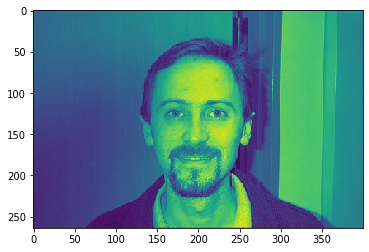

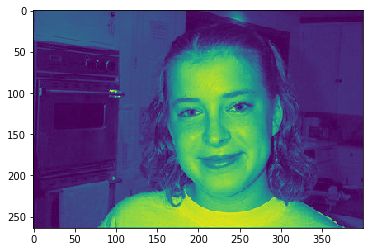

In [12]:
plt.imshow(imd["image_0146.jpg"].image)
plt.show()
plt.imshow(imd["image_0361.jpg"].image)
plt.show()

## Custom pipeline components
What if we wanted to create a custom pipeline component?

Let's create one that quantizes each of the images that passed our previous filter operations.

In [13]:
from kaishi.core.pipeline_component import PipelineComponent

# Follow rules specified in the pipeline component guide
class TransformByQuantizing(PipelineComponent):
    """Transform that quantizes images."""

    def __init__(self):
        super().__init__()
        self.configure()
        self.applies_to_available = True  # Set this to true if using the "get_target_indexes" method

    def __call__(self, dataset):
        # Trim any files without image extensions
        for i in self.get_target_indexes(dataset):
            dataset.files[i].image = dataset.files[i].image.quantize(colors=self.n_colors).convert("L")
            dataset.files[i].update_derived_images()  # This updates thumbnails/etc.
    
    def configure(self, n_colors=32):
        self.n_colors = n_colors
        
imd.TransformByQuantizing = TransformByQuantizing

Check to see that it was properly added

In [14]:
imd.get_pipeline_options()

['FilterByLabel',
 'FilterByRegex',
 'FilterDuplicateFiles',
 'FilterInvalidFileExtensions',
 'FilterInvalidImageHeaders',
 'FilterSimilar',
 'FilterSubsample',
 'LabelerGenericConvnet',
 'LabelerValidationAndTest',
 'TransformByQuantizing',
 'TransformFixRotation',
 'TransformLimitDimensions',
 'TransformToGrayscale']

In [15]:
imd.configure_pipeline(["TransformByQuantizing"])
print(imd.pipeline)

Kaishi pipeline: 
0: TransformByQuantizing
     n_colors: 32



In [16]:
imd.pipeline.components[0].configure(n_colors=10)
imd.pipeline.components[0].applies_to("image_01.*jpg")
print(imd.pipeline)
imd.run_pipeline()

Kaishi pipeline: 
0: TransformByQuantizing
     n_colors: 10



As expected, any image with the pattern image_01... is quantized (most notable in the background) whereas any image not matching this pattern remained intact.

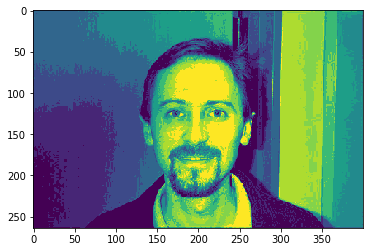

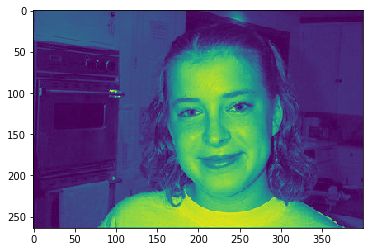

In [17]:
plt.imshow(imd["image_0146.jpg"].image)
plt.show()
plt.imshow(imd["image_0361.jpg"].image)
plt.show()

## Saving
Finally, we can save the edited dataset

In [18]:
imd.save("Faces_edited")

In [19]:
imd_edited = ImageDataset("Faces_edited")
imd_edited.load_all()

/Users/mwharton/.miniconda3/envs/kaishi/lib/python3.7/site-packages/kaishi/image/dataset.py:20: UserWarning: No GPU detected, ConvNet prediction tasks will be very slow
  warnings.warn("No GPU detected, ConvNet prediction tasks will be very slow")


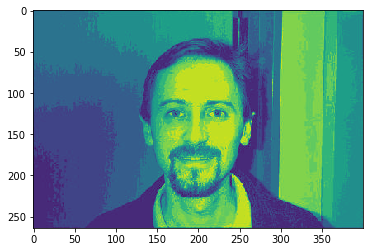

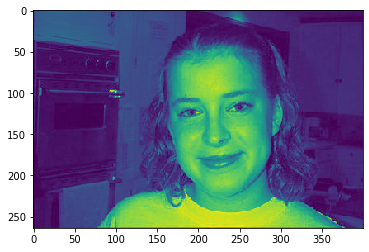

In [20]:
plt.imshow(imd_edited["image_0146.jpg"].image)
plt.show()
plt.imshow(imd_edited["image_0361.jpg"].image)
plt.show()